**CODSOFT INTERNSHIP**

**TASK 2 : MOVIE RATING PREDICTION**


---




*   Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.
* The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.

*  Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.


---




Importing Required Libraries :

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Dataset :

In [ ]:
df = pd.read_csv(r"IMDb Movies India.csv", encoding='ISO-8859-1')

Remove Rows with Missing Rating :

In [ ]:
df = df.dropna(subset=['Rating'])

Cleaning and Converting the Votes Column :

In [ ]:
df['Votes'] = df['Votes'].astype(str).str.replace(',', '', regex=False)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

Extracting Year from the Year Column :

In [ ]:
df['Year'] = df['Year'].astype(str).str.extract(r'(\d{4})')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

Extracting Numeric Duration :

In [ ]:
df['Duration'] = df['Duration'].str.extract(r'(\d+)')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

Combining Actors into One Column :

In [ ]:
df['Actors'] = df[['Actor 1', 'Actor 2', 'Actor 3']].fillna('').agg(' '.join, axis=1)

Selecting Required Columns :

In [ ]:
data = df[['Genre', 'Director', 'Actors', 'Votes', 'Duration', 'Year', 'Rating']]

Dropping the Rows with Missing Categorical Values :

In [ ]:
data = data.dropna(subset=['Genre', 'Director', 'Actors'])

Separating Features and Rating :

In [ ]:
X = data.drop('Rating', axis=1)
y = data['Rating']

Defining Categorical and Numerical Columns :

In [ ]:
categorical_cols = ['Genre', 'Director', 'Actors']
numeric_cols = ['Votes', 'Duration', 'Year']

Creating Transformers :

In [ ]:
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', max_categories=20))
])

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

Combining Transformers using ColumnTransformer :

In [ ]:
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

Graph of Distribution of Ratings :

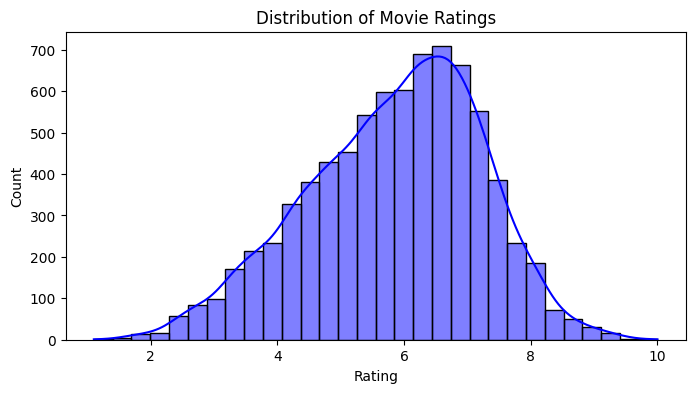

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(y, bins=30, kde=True, color='blue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Building Model and Training :

In [ ]:
def build_and_evaluate(model):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R² Score:", r2_score(y_test, y_pred))
    print('-' * 30)

    return pipeline, X_test, y_test, y_pred

Training Linear Regression & Random Forest :

In [ ]:
lr_pipeline, X_test, y_test, lr_pred = build_and_evaluate(LinearRegression())
rf_pipeline, _, _, rf_pred = build_and_evaluate(
    RandomForestRegressor(n_estimators=100, random_state=42)
)

Model: LinearRegression
Mean Squared Error: 1.8027938437218967
R² Score: 0.06208453240485301
------------------------------
Model: RandomForestRegressor
Mean Squared Error: 1.3407260601274953
R² Score: 0.30247836491089
------------------------------


Graph of Actual Vs Predicted Linear Regression :

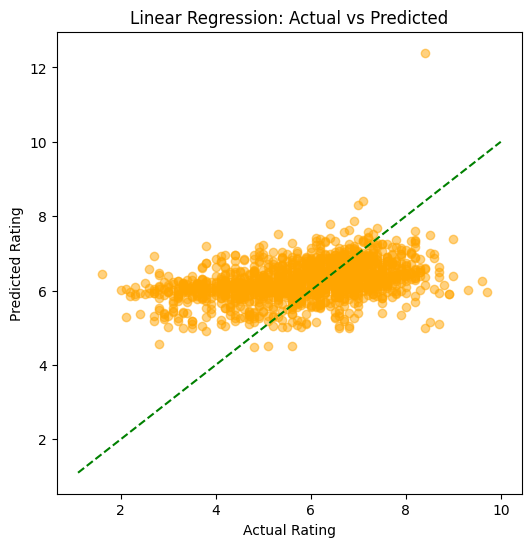

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, lr_pred, alpha=0.5, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'g--')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

Graph for Random Forest Results :

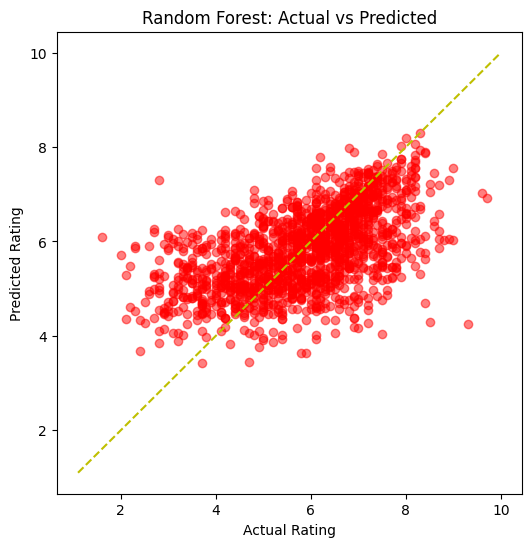

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, rf_pred, alpha=0.5, color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'y--')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Random Forest: Actual vs Predicted')
plt.show()

Graph of Top 10 Feature Importance Analysis :

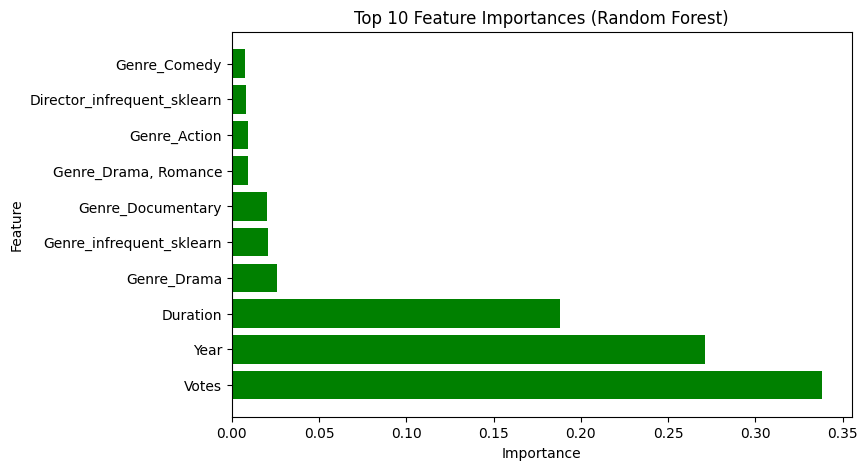

In [ ]:
onehot_features = rf_pipeline.named_steps['preprocessor'] \
    .transformers_[1][1] \
    .named_steps['onehot'] \
    .get_feature_names_out(categorical_cols)

all_features = numeric_cols + list(onehot_features)
importances = rf_pipeline.named_steps['model'].feature_importances_

feat_imp = pd.Series(importances, index=all_features) \
    .sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
plt.barh(feat_imp.index, feat_imp.values, color='green')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()